### SIMPLE DATA VISUALIZATION


#### Introduction

Data visualization is simply presenting data in a graphical or pictorial form which makes information easy to understand. It helps to explain facts, to recognise patterns and also serve as as the first step of analysis for any scientific work.

#### Why Python ?
<p>Python is an interpreted, high-level, general-purpose programming language.
    <ul>
        <li> Python is powerful</li>
        <li> Python is easy to use and learn</li>
        <li> Python is free and open-source language</li>
        <li> Python has multiple libraries for data analysis</li>
        <li> Python has a strong community</li> 
        </ul> 
</p>



#### Objectives
<ul>
    <li>Popular Python libraries for visualization</li>
    <li>Univariate plots</li>
    <li>Bivariate plots</li>
    <li>Multivariate plots</li>
    <li>Numerical features against categorical features</li>
    <li>Categorical features against numerical features</li>
    <li>Visualization for TimeSeries 
</ul>


Popular Python libraries for visualization:

<ul>
    <li>Matplotlib: The OG of visualization, most libraries build ontop of it.</li>
    <li>Seaborn: High level viz library built ontop of Matplotlib. Offers intuitive and simple interface</li>
    <li>ggplot: Based on the popular R ggplot</li>
    <li>Plotly: Useful for clean interactive plots. Has online publishing options</li>
    <li>Bokeh: Similar to Plotly, great for interactive web-ready plots.</li>
    <li>geoplotlib: Great for geographical plotting</li>

</ul>


### Univariate Plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd


plt.plot(np.sin(range(10)))


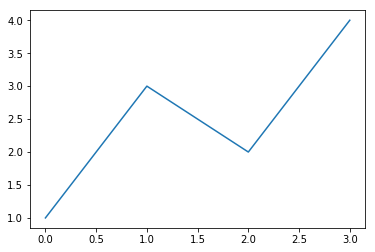

In [5]:
plt.plot([1,3,2,4])
plt.show()

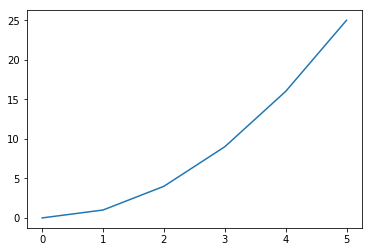

In [106]:
x = range(6)
plt.plot(x, [xi**2 for xi in x])


In [4]:
tips = sb.load_dataset('tips')
titanic = sb.load_dataset('titanic')          ##### take a peak at the datasets
flights = sb.load_dataset('flights')


tips.head()
#titanic.head(10)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


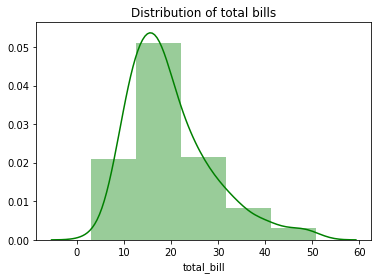

In [112]:

sb.distplot(tips['total_bill'], color='g',bins=5)    #### eg distribution plot
plt.title("Distribution of total bills")
plt.show()

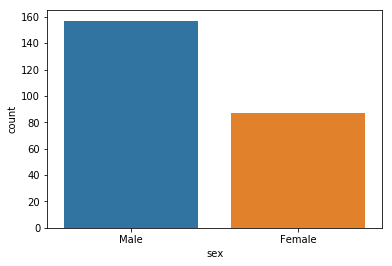

In [113]:
sb.countplot(tips['sex'])             ##### barplots

### Bivariate Plots
Bivariate Plots are used when we want to compare two variables together. Bivariateplots show relationship between two variables.

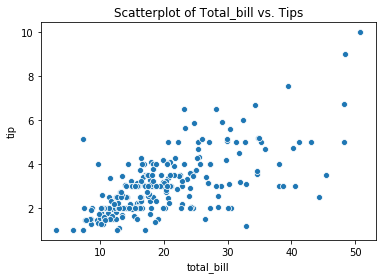

In [38]:
sb.scatterplot(x='total_bill', y='tip', data=tips)    ###  eg scatterplot
plt.title("Scatterplot of Total_bill vs. Tips")
plt.show()

### Multivariate or Multiline Plots
Multivariate plots can show the relationship between three or more features.

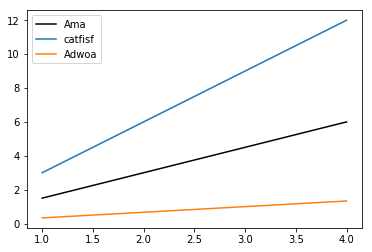

In [116]:
x = range(1, 5)
plt.plot(x, [xi*1.5 for xi in x], label= "Ama", color="k")   ####add legend and labels and grid lines
plt.plot(x, [xi*3.0 for xi in x], label="catfisf")
plt.plot(x, [xi/3.0 for xi in x], label ="Adwoa")
plt.legend()

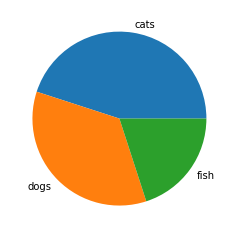

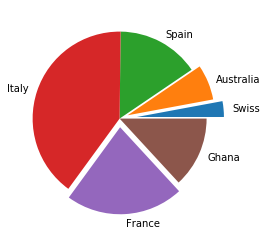

In [118]:
x = [45, 35, 20]
labels = ['cats','dogs','fish']
plt.pie(x, labels=labels)
plt.show()


x = [4,9,21,55,30,18]
labels = ['Swiss', 'Australia', 'Spain', 'Italy', 'France','Ghana']
explode = [0.2,0.1,0,0,0.1,0]
plt.pie(x, labels=labels, explode=explode)
plt.show()



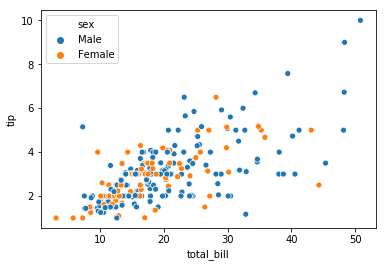

In [40]:
sb.scatterplot(x='total_bill', y='tip', data=tips_df, hue='sex')

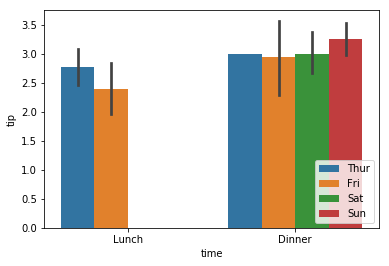

In [123]:
#tips.head
ax=sb.barplot(x='time', y='tip', data=tips, hue='day')
ax.legend(loc=4)

### Categorical features against numerical features.

When one or both the variables under study are categorical, we use plots like striplot(),
swarm plot(), etc,. Seaborn provides interface to do so

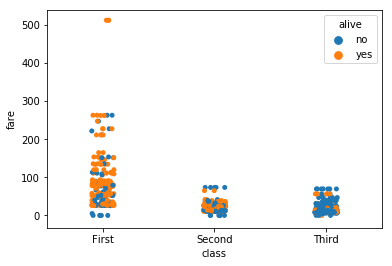

In [5]:
sb.stripplot(x='class', y='fare', data=titanic, hue='alive')
plt.show()

### VISUALIZATION FOR TIMESERIES DATA

Timeseries data are common types of data set in data analytics.
A time series is any data set where the values are measured at different points in time. Many time series are uniformly spaced at a specific frequency, for example, hourly weather measurements, daily counts of web site visits, or monthly sales totals.

in this section, we'll focus on :

Preparing a dataframe for timeseries visualization.

Basic line plots.

Seasonality.

To work with time series data in pandas, we have to convert the Date feature into a pandas DateTimeIndex and then we use a DatetimeIndex as the index for our DataFrame (or Series). 

In [3]:
time_series = pd.read_csv('opsd_germany_daily.csv')
#time_series.head()   #take a peak at the data
#time_series.dtypes   ### data type of the various culumns 

time_series['Date'] = pd.to_datetime(time_series['Date'])
time_series = time_series.set_index('Date')
#time_series.dtypes

#print(time_series)

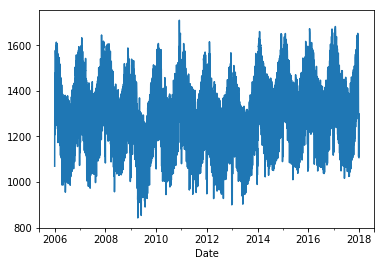

In [129]:
time_series['Consumption'].plot()

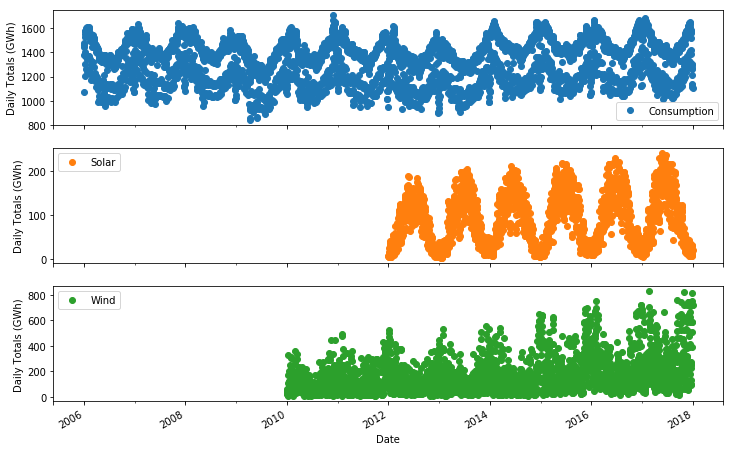

In [8]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = time_series[cols_plot].plot(marker='o', linestyle='None', figsize=(12, 8), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
    
#print(time_series)

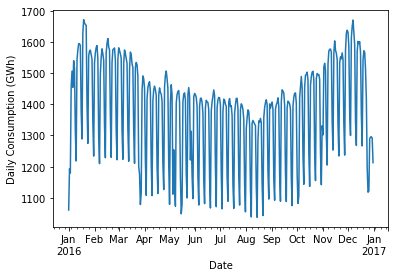

In [133]:
ax = time_series.loc['2016', 'Consumption'].plot() ##selecting a particlar year
ax.set_ylabel('Daily Consumption (GWh)');

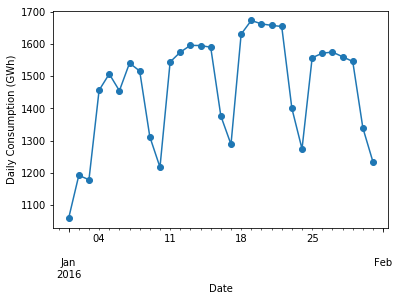

In [136]:
ax = time_series.loc['2016-01':'2016-01', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');
plt.savefig('month')
plt.savefig('calabash.pdf')

#### Boxplots
Boxplot is a convenient way to visualize the distribution of data through their quartiles.
Box plots usually have vertical lines extending from the boxes which are called whiskers . These whiskers indicate variability outside the upper and lower quartiles. Any Outlier in the data is plotted as individual points.

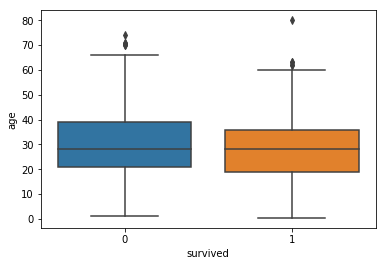

In [7]:
sb.boxplot(x='survived', y='age',  data=titanic)
plt.show()

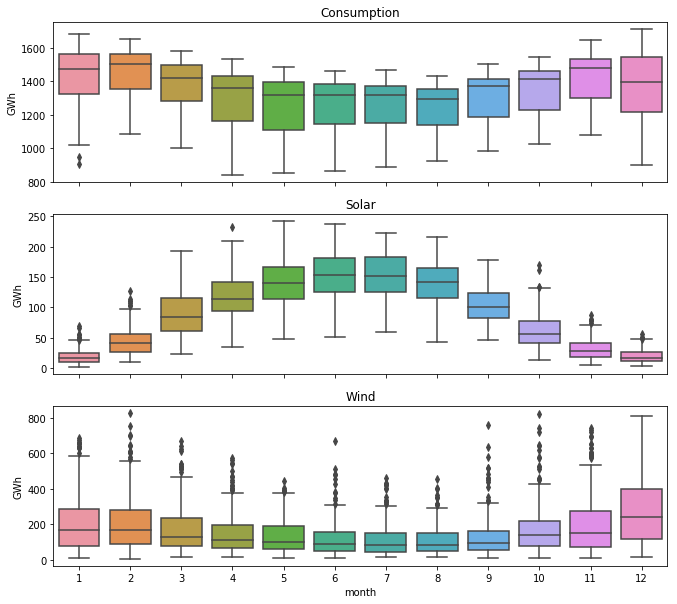

In [137]:
time_series['month'] = time_series.index.month
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sb.boxplot(data=time_series, x='month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
        